In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('white')
import hoag  
import mod_l_exp.utils as mlx
import numpy as np

### GENERATE DATASET

In [2]:
dataset = mlx.generate_multiclass_dataset(n_samples=90000, n_features=1000, n_informative=50, n_redundant=25, n_repeated=0,
                                      n_classes=2, n_clusters_per_class=3,
                                      flip_y=0.1, class_sep=1.0,
                                      random_state=1, hot_encoded=False, partitions_proportions=[1/3, 1/3])

datasets.redivide_data:, computed partitions numbers - [0, 30000, 60000, 90000] len all 90000 DONE


### RESPONSE  FUNCTION for $\alpha$

Setting: we use logistic regression (for binary classification) and optimize regularization hyper-parameter

In [3]:
from sklearn import linear_model

alphas = np.linspace(-0, 20, 50)

def cost_func(a):
    clf = linear_model.LogisticRegression(
        solver='lbfgs',
        C=np.exp(-a), fit_intercept=True, 
        tol=1e-15, max_iter=500)

    clf.fit(dataset.train.data, dataset.train.target)
    cost = linear_model.logistic._logistic_loss(clf.coef_.ravel(), 
                                                dataset.validation.data, dataset.validation.target, 0.)
    print('.', end='')
    return cost

In [4]:
scores = [cost_func(a) for a in alphas]

..................................................

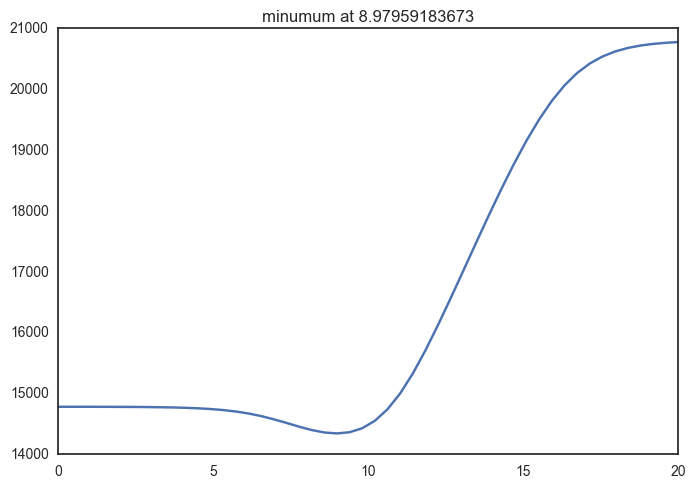

In [5]:
plt.plot(alphas, scores)
plt.title('minumum at ' + str(alphas[np.argmin(scores)]));

### HOAG - NO BOUNDS ON $\alpha$

In [4]:
from mod_l_exp.rfho_exp import *

Experiment save directory is  C:\Users\lfranceschi\EXPERIMENTS


In [5]:
saver = rf.Saver(['HOAG comparrison', 'from forked hoag'])
# saver = None 

folder C:\Users\lfranceschi\EXPERIMENTS\HOAG comparrison\from forked hoag\26-06-17__19h35m has been created


In [10]:
identity = lambda x: x
clf, res_h = mlx.hoag_fit(saver, dataset, alpha0=0., projection=identity, max_iter=30)


started hoag
WARNING, No tensorflow session available
Step 0                      Values
-------------------  -------------
training error       1205451.88885
validation error     1214580.71371
test error           1222810.27415
validation accuracy        0.50340
test accuracy              0.50210
alpha                      0.00000
der alpha                  0.00000
step size                  0.00000
Elapsed time (sec)      1407.00000
File saved!
inner level iterations: 146, inner objective 13627.1182556, grad norm 239.78034209634208
Inverting matrix with precision 0.001
increased step size
it 1, g: 14732.3968554, incr: -inf, sum lambda 2.0, epsilon: 0.0009000000000000001, L: 16.934915193, norm grad_lambda: 17.826226519
WARNING, No tensorflow session available
Step 1                    Values
-------------------  -----------
training error       13636.07757
validation error     14732.39686
test error           14752.14739
validation accuracy      0.77293
test accuracy            0.7756

file saved


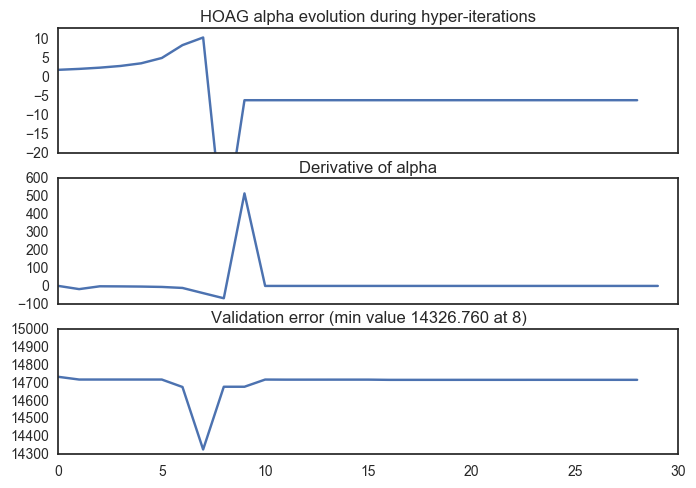

In [11]:
fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(res_h['alpha'][1:])
ax[0].set_ylim(-20, 13)
ax[0].set_title('HOAG alpha evolution during hyper-iterations')
ax[1].plot(res_h['der alpha'])
ax[1].set_title('Derivative of alpha')

ax[2].set_ylim(14300, 15000)
ax[2].plot(res_h['validation error'][1:])
ax[2].set_title('Validation error (min value %.3f at %d)' % 
                (np.min(res_h['validation error']), np.argmin(res_h['validation error'])))  # the one we're optimizing
if saver: saver.save_fig('HOAG')

In [6]:
tf.reset_default_graph()
res = rtho_experiment(dataset, saver, optimizer_kwargs={'mu': .5, 'lr': 1.e-7}, 
                      # very small learning rate since the error is not normalized
                      hyper_iterations=800,  # more or less it converges
                    hyper_optimizer_class=rf.AdamOptimizer, 
                    hyper_optimizer_kwargs={'lr':1.e-2}, 
                      # hyper step size is double our proposed "default value" to speed 
                      # things up...
                   hyper_batch_size=10)

settings var names      values
----------------------  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

folder C:\Users\lfranceschi\EXPERIMENTS\HOAG comparrison\from forked hoag\26-06-17__19h35m\Plots has been created
file saved


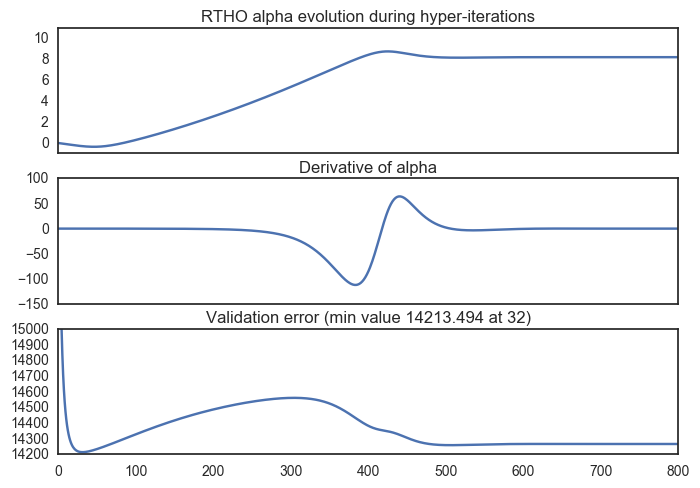

In [8]:
fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot([e[0] for e in res['alpha'][1:]])
ax[0].set_ylim(-1, 11)
ax[0].set_title('RTHO alpha evolution during hyper-iterations')
ax[1].plot([e[1] for e in res['alpha']])
ax[1].set_title('Derivative of alpha')

ax[2].set_ylim(14200, 15000)
ax[2].plot(res['validation error (sum)'][1:])
ax[2].set_title('Validation error (min value %.3f at %d)' % 
                (np.min(res['validation error (sum)']),
                 np.argmin(res['validation error (sum)'])))  # the one we're optimizing
if saver: saver.save_fig('RTHO plots')